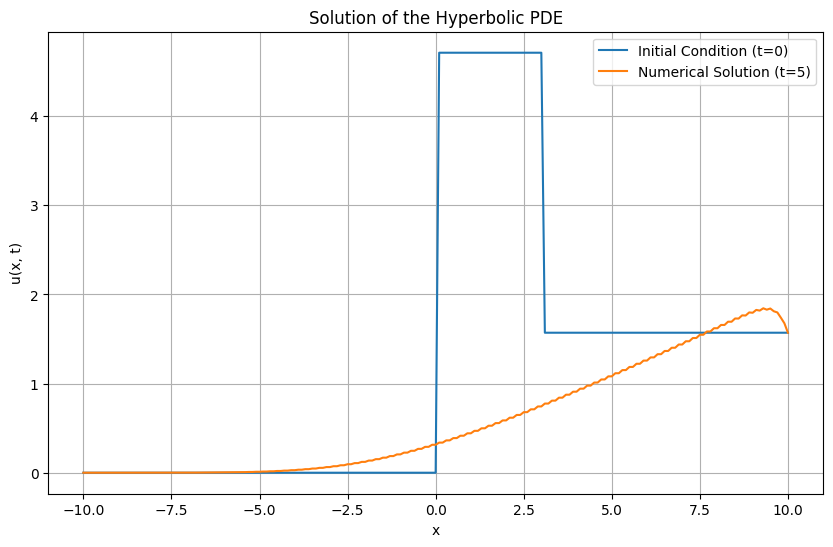

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сетки
x_min, x_max = -10, 10  # Границы пространства
t_max = 5               # Максимальное время
dx = 0.1                # Шаг по пространству
dt = 0.01               # Шаг по времени

# Число Куранта (для устойчивости)
c = dt / dx

# Сетка
x = np.arange(x_min, x_max + dx, dx)
t_steps = int(t_max / dt)

# Начальные условия
def initial_condition(x):
    if x < 0:
        return 0
    elif 0 <= x <= 3:
        return 3 * np.pi / 2
    else:
        return np.pi / 2

u = np.array([initial_condition(xi) for xi in x])  # Начальное распределение

# Решение с использованием схемы Лакса-Фридрихса
def lax_friedrichs(u, c, t_steps):
    u_new = u.copy()
    for _ in range(t_steps):
        u_new[1:-1] = 0.5 * (u[:-2] + u[2:]) - c * (u[2:]**2 - u[:-2]**2) / 4
        u = u_new.copy()
    return u

# Решение
u_final = lax_friedrichs(u, c, t_steps)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, u, label="Initial Condition (t=0)")
plt.plot(x, u_final, label=f"Numerical Solution (t={t_max})")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Solution of the Hyperbolic PDE")
plt.legend()
plt.grid()
plt.show()

'/mnt/hyperbolic_pde_solution.gif'

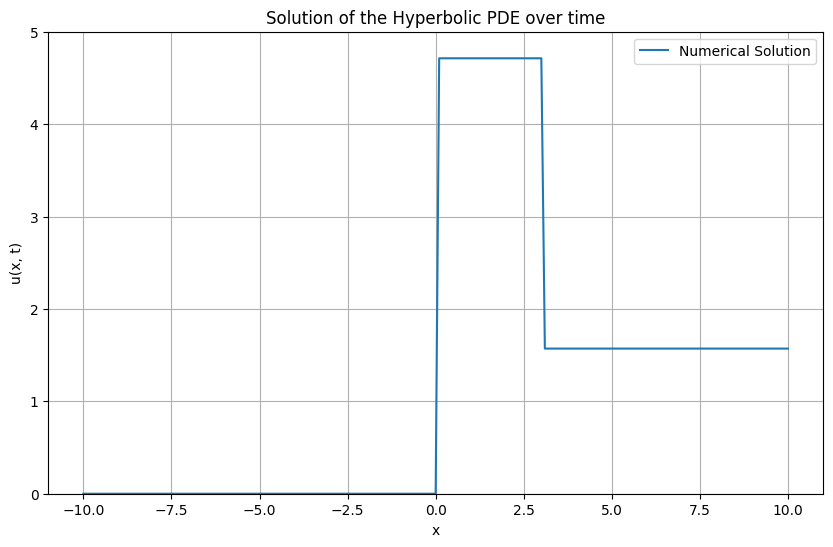

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Функция для обновления решения на каждом временном шаге
def lax_friedrichs_step(u, c):
    u_new = u.copy()
    u_new[1:-1] = 0.5 * (u[:-2] + u[2:]) - c * (u[2:]**2 - u[:-2]**2) / 4
    return u_new

# Генерация кадров для гифки
frames = []
u = np.array([initial_condition(xi) for xi in x])  # Начальное распределение
u_current = u.copy()

# Создание кадров
for t_step in range(t_steps):
    if t_step % (t_steps // 50) == 0:  # Записываем 50 кадров равномерно по времени
        frames.append(u_current.copy())
    u_current = lax_friedrichs_step(u_current, c)

# Функция для анимации
def update_plot(frame, x, line):
    line.set_ydata(frame)
    return line,

# Настройка графика
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, frames[0], label="Numerical Solution")
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.set_title("Solution of the Hyperbolic PDE over time")
ax.grid()
ax.set_ylim(0, 5)
ax.legend()

# Анимация
ani = animation.FuncAnimation(fig, update_plot, frames=frames, fargs=(x, line), interval=100)

# Сохранение анимации
gif_path = "/mnt/hyperbolic_pde_solution.gif"
ani.save(gif_path, writer="pillow")

gif_path

<ipython-input-8-52423ed56fa3>:14: RuntimeWarning: overflow encountered in scalar power
  u_new[i] = u[i] - c * (u[i]**2 - u[i-1]**2) / 2 + sigma * (u[i+1] - 2*u[i] + u[i-1])
<ipython-input-8-52423ed56fa3>:14: RuntimeWarning: invalid value encountered in scalar subtract
  u_new[i] = u[i] - c * (u[i]**2 - u[i-1]**2) / 2 + sigma * (u[i+1] - 2*u[i] + u[i-1])
<ipython-input-8-52423ed56fa3>:14: RuntimeWarning: invalid value encountered in scalar add
  u_new[i] = u[i] - c * (u[i]**2 - u[i-1]**2) / 2 + sigma * (u[i+1] - 2*u[i] + u[i-1])


'/mnt/hyperbolic_pde_solution_diffusion.gif'

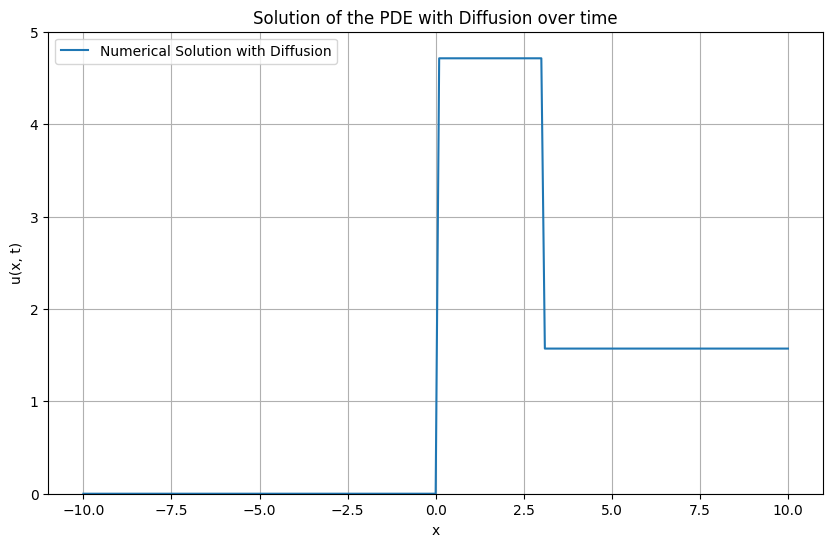

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Параметры задачи
epsilon = 4  # Диффузионный параметр

# Число Куранта для схемы с диффузией и конвекцией
c = dt / dx
sigma = epsilon * dt / (dx**2)

# Обновление схемы с диффузией
def lax_friedrichs_diffusion(u, c, sigma):
    u_new = u.copy()
    for i in range(1, len(u) - 1):
        u_new[i] = u[i] - c * (u[i]**2 - u[i-1]**2) / 2 + sigma * (u[i+1] - 2*u[i] + u[i-1])
    return u_new

# Генерация кадров для гифки с учетом диффузии
frames_diffusion = []
u = np.array([initial_condition(xi) for xi in x])  # Начальное распределение
u_current = u.copy()

# Создание кадров
for t_step in range(t_steps):
    if t_step % (t_steps // 50) == 0:  # Записываем 50 кадров равномерно по времени
        frames_diffusion.append(u_current.copy())
    u_current = lax_friedrichs_diffusion(u_current, c, sigma)

# Анимация для задачи с диффузией
fig_diffusion, ax_diffusion = plt.subplots(figsize=(10, 6))
line_diffusion, = ax_diffusion.plot(x, frames_diffusion[0], label="Numerical Solution with Diffusion")
ax_diffusion.set_xlabel("x")
ax_diffusion.set_ylabel("u(x, t)")
ax_diffusion.set_title("Solution of the PDE with Diffusion over time")
ax_diffusion.grid()
ax_diffusion.set_ylim(0, 5)
ax_diffusion.legend()

# Анимация
ani_diffusion = animation.FuncAnimation(fig_diffusion, update_plot, frames=frames_diffusion, fargs=(x, line_diffusion), interval=100)

# Сохранение анимации
gif_path_diffusion = "/mnt/hyperbolic_pde_solution_diffusion.gif"
ani_diffusion.save(gif_path_diffusion, writer="pillow")

gif_path_diffusion

In [8]:
import numpy as np

def solve(
        eps: float,
        a: float,
        left_boundary_condition_value: float,
        right_boundary_condition_value: float,
        T: float,
        h: float,
        tau: float
):
    # Heaviside function (Функция Хевисайда)
    def H(x):
        H = np.empty(len(x), dtype=float)
        for i in range(len(x)):
            H[i] = 1.0 if x[i] > 0 else 0.0
        return H
    # Инициализирую массивы координат, времени, а также массив значений текущей функции
    x = np.arange(left, right + h, h)
    t = np.arange(0, T + tau, tau)
    u = np.zeros((len(t), len(x)))
    cur = left
    for i in range(len(u[0])):
        u[0, i] = initial_condition(cur)
        cur+=h
    x = np.arange(left, right + h, h)
    for n in range(0, len(t) - 1):
        for i in range(1, len(x) - 1):
            u[n + 1, i] = u[n, i] + tau * (
                    eps * ((u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / h ** 2) -
                    u[n, i] * ((u[n, i + 1] - u[n, i - 1]) / (2 * h))
            )

    return u, x

In [18]:
# Global parameters
eps = 1.5
a = 1.0
T = 20
h = 0.05
tau = h ** 2 / (2 * abs(eps)) if eps != 0 else h ** 2 / 2
L = 3.0
left, right = -L, L
left_boundary_condition_value, right_boundary_condition_value = 1.0, 0.0

In [19]:
u, x = solve(
    eps,
    a,
    left_boundary_condition_value,
    right_boundary_condition_value,
    T,
    h,
    tau
)

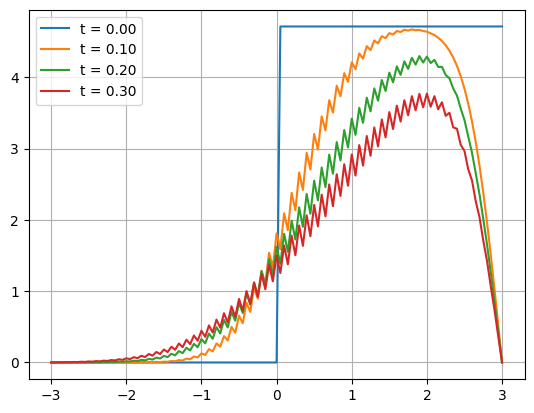

In [20]:
step_count = 5
times_to_plot = np.arange(0, T, T / step_count)
times_to_plot = [0, 0.1, 0.2, 0.3]
for t in times_to_plot:
    n = int(t / tau)
    plt.plot(x, u[n, :], label=f't = {t:.2f}')
plt.legend()
plt.grid(True)
plt.show()

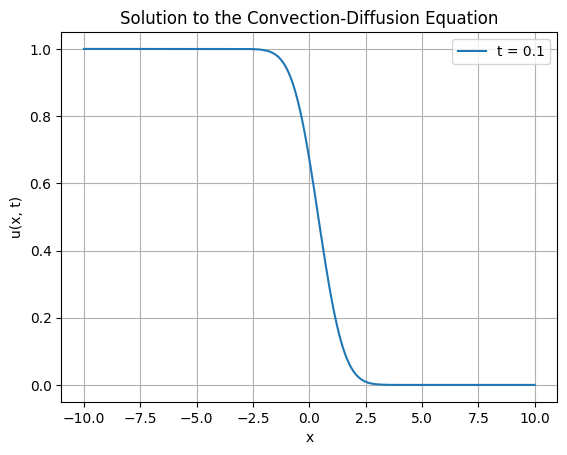

In [25]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Parameters
D = 4.0     # Diffusion coefficient
v = 4.0       # Convection velocity
t = 0.10       # Time at which to compute the solution

# Define the initial condition function psi(x)
def psi(x):
    # Example initial condition (e.g., Gaussian)
    return 1 - (1 if x>=0 else 0)

# Define the integrand for the solution u(x, t)
def integrand(y, x, t):
    return psi(y) * np.exp(-(x - y - v * t)**2 / (4 * D * t))

# Define the function u(x, t) using numerical integration
def u(x, t, D, v):

    if t == 0:
        return psi(x)
    if D == 0:
        return psi(x - v * t)
    factor = 1 / np.sqrt(4 * np.pi * D * t)
    integral, _ = quad(integrand, -np.inf, np.inf, args=(x, t))
    return factor * integral

# Compute and plot the solution at time t
x_values = np.linspace(-10, 10, 5000)
u_values = [u(x, t, D, v) for x in x_values]

plt.plot(x_values, u_values, label=f't = {t}')
plt.title("Solution to the Convection-Diffusion Equation")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

In [26]:
# Global names:
image_folder = 'pictures'
gif_path = 'animation.gif'

In [27]:
def get_plots():
    us = []
    x1 = [i * 0.1 for i in range(-100, 700, 1)]
    for t in np.arange(0.0, 30, 1.0):
        result=[]
        for el in x1:
            result.append(u(el, t, D, v))
        us.append((result, t))
    return us

In [28]:
import os
def fill_pictures_folder(plots):
    for filename in sorted(os.listdir(image_folder)):
        if filename.endswith('.png'):
            file_path = os.path.join(image_folder, filename)
            os.remove(file_path)

    for u1, t in plots:
        plt.plot(x1, u1)
        plt.title('t = ' + str(t))
        plt.grid(True)
        plt.xlabel('x')
        plt.ylabel('u(x)')
        plt.ylim(-1.0, 2.0)
        plt.savefig(f'pictures/{t}.png')
        plt.close()

In [29]:
from PIL import Image
import os
def create_animation():
    images = []

    for filename in sorted([filename for filename in os.listdir(image_folder) if filename.endswith('.png')], key = lambda x: float(x[:-4])):
        file_path = os.path.join(image_folder, filename)
        images.append(Image.open(file_path))

    if images:
        images[0].save(
            gif_path,
            save_all=True,
            append_images=images[1::],
            duration=1,
            loop=0
        )

In [31]:
plots = get_plots()
fill_pictures_folder(plots)
create_animation()


FileNotFoundError: [Errno 2] No such file or directory: 'pictures'